# Data Preprocessing
Before engaging in exploratory data analysis, there are a few apriori preprocessing steps to be taken which will facilitate the profiling and analysis effort. 

Missing values are encoded as '-1' in the dataset. Our in-memory data analysis framework handles missing values quite facily as non-numbers or NaNs. Our first preprocessing step will be to convert the '-1' values to NaN values. Second, add column names, and convert the data types for the object data types to pandas category data types. This will bring some computational efficiency that will be well placed for a file of this size. We'll convert the target variable, 'sale' from a numeric to a binary categorical variable and lastly, convert the separator from the tab to comma.

Again, we will create hasty data pipeline to handle these changes for us. 

In [17]:
# IMPORTS
from myst_nb import glue
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.width', 1000)

from cvr.core.atelier import AtelierFabrique, Atelier
from cvr.core.dataset import Dataset, DatasetReader, DatasetWriter
from cvr.core.pipeline import DataPipeline, DataPipelineBuilder


## Data Preprocessing
Let's instantiate the studio containing our data.

In [19]:
studio = Atelier(name='incept')
dataset = studio.get_asset_by_aid(aid='0003')

The dataset created during the acquistion step was the second version of the Dataset object 'criteo' for the preprocessed stage.

In [20]:
dataset.info

,Data Type,Count,Missing,% Missing,Unique,% Unique,Memory Usage
0,int64,15995633,0,0.00,2,0.00,127965064
-1,float64,15995633,0,0.00,513407,3.21,127965064
-1.1,int64,15995633,0,0.00,574348,3.59,127965064
1598891820,int64,15995633,0,0.00,6456933,40.37,127965064
-1.2,int64,15995633,0,0.00,4614,0.03,127965064
0.0,float64,15995633,0,0.00,43143,0.27,127965064
-1.3,object,15995633,0,0.00,12,0.00,1070809627
7E56C27BFF0305E788DA55A029EC4988,object,15995633,0,0.00,9,0.00,1423520377
-1.4,object,15995633,0,0.00,18229,0.11,1078550827
-1.5,object,15995633,0,0.00,18,0.00,1073985517


## Dataset Overview
### Dataset Summary Statistics

In [21]:
dataset.passport.print()



                                 Asset Passport                                 
      Create Dataset Object From Criteo Labs Conversion Logs Dataset (Raw)      
      ____________________________________________________________________      
                              aid : 0003
                       asset_type : dataset
                             name : criteo
                      description : Create Dataset object from Criteo Labs Conversion Logs Dataset (Raw)
                            stage : raw
                          version : 0
                         filepath : ateliers\incept\raw_dataset_criteo_v000.pkl


AttributeError: 'AssetPassport' object has no attribute 'stamps'

In [5]:
# GLUE
_ = glue("profile_rows",summary["Rows"], display=False)
_ = glue("profile_columns", summary["Columns"], display=False)
_ = glue("profile_missing", summary["Missing Cells %"], display=False)
_ = glue("profile_size", summary["Size (Mb)"], display=False)
_ = glue("profile_dups", summary["Duplicate Rows"], display=False)
_ = glue("profile_dup_pct", summary["Duplicate Rows %"], display=False)

This dataset contains some {glue:}`profile_rows` observations, each with {glue:}`profile_columns` columns for a size of {glue:}`profile_size` Mb.  Approximately {glue:}`profile_missing`% of the data are missing, reflecting the sparsity challenge of user behavior logs. Further, we have about {glue:}`profile_dups` duplicate rows, just {glue:}`profile_dup_pct`% of the sample; nonetheless, duplicates must be removed prior to modeling.

### Dataset Columns and Datatypes

In [6]:
_ = dataset.profile.datatypes



                                   Data Types                                   
                                   __________                                   
                               category : 17
                                float64 : 5
                                 object : 1


There 17 categorical, 5 numeric variables and a single object variable, 'product_title', which we will treat as a string.


In [7]:
_ = dataset.info()



                                 Dataset criteo                                 
                                 ______________                                 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   sale                   10000 non-null  category
 1   sales_amount           1612 non-null   float64 
 2   conversion_time_delay  1608 non-null   float64 
 3   click_ts               10000 non-null  float64 
 4   n_clicks_1week         4700 non-null   float64 
 5   product_price          10000 non-null  float64 
 6   product_age_group      1815 non-null   category
 7   device_type            9991 non-null   category
 8   audience_id            2809 non-null   category
 9   product_gender         1794 non-null   category
 10  product_brand          2748 non-null   category
 11  product_category_1     4786 non-nu

The non-null counts above hint at the varying degrees of data sparsity among the columns of the dataset. Let's take a coler look.
### Missing Values Analysis

In [8]:
_ = dataset.profile.missing



                            Missing Values Analysis                             
                              Criteo Preprocessed                               
                            _______________________                             


                                    Summary                                     
                                    _______                                     
                                      n : 10,000
                                columns : 23
                                  cells : 230,000
                                Missing : 113,984
                            Missingness : 49.56




                           Missing Analysis by Column                           
                           __________________________                           
                           n  Missing  Missingness
sale                   10000        0         0.00
sales_amount           10000     8388        83.88
conversion_time_delay  10000  

Here, we get a better sense of the scope and location of our data sparsity challenge. Nearly half of the data are absent; although, we may assume that some proportion of the missing data is not missing at random (MAR). Products defined by fewer than seven categories, sales_amounts for which no conversion takes place, or items for which no age group is defined reflect missingness in the data that may be explained. On the other hand, we have no statistically valid methods of verifying the extent to which any data are missing at random or missing completely at random.

Data sparsity and diversity are characteristics of user behavior data. Statistical and modeling techniques must therefore be robust to missingness in the data.

### Cardinality Analysis
With user behavior and conversion log data, we expect high cardinality among users and lower cardinality among the items.

In [9]:
_ = dataset.profile.cardinality



                              Cardinality Analysis                              
                              Criteo Preprocessed                               
                              ____________________                              
                   Column  Unique  Total  Pct Unique
0                    sale       2  10000        0.02
1            sales_amount    1288   1612       79.90
2   conversion_time_delay    1484   1608       92.29
3                click_ts    9578  10000       95.78
4          n_clicks_1week     529   4700       11.26
5           product_price     983  10000        9.83
6       product_age_group       8   1815        0.44
7             device_type       3   9991        0.03
8             audience_id     583   2809       20.75
9          product_gender       7   1794        0.39
10          product_brand     997   2748       36.28
11     product_category_1      19   4786        0.40
12     product_category_2     115   4781        2.41
13     produc

As expected, high cardinality among users and very low cardinality among products, and their categories. However, converting variables with 56,000 unique categories into binary vector representations increases the complexity of the learning problem and comes at a computational cost. The high cardinality variables will require scalable encoding techniques that retain the patterns, shapes, and distances of and within the data.

So far, we might characterize the dataset as relatively sparse, with pockets of extremely high cardinality as evidenced by the following descriptive statistics on the categorical frequency distribution.

In [10]:
_ = dataset.profile.frequency_stats



                        Categorical Frequency Statistics                        
                              Criteo Preprocessed                               
                        ________________________________                        
   count     mean      std  min  25%    50%    75%      max
0  18.00 1,316.72 2,805.54 1.00 9.25 105.00 543.50 9,942.00


These data show that, on average, our 18 categorical variables have over 900,000 unique values. Some of the extremes have between 15,000 and upwards of 14M categorical levels. Yet, as Vilfredo Pareto, George Zipf, and others have pointed out, it is often the case that a large proportion of wealth, language, and data are represented by a relatively limited percentage of people, words, and dimensions. 

Zipf's law, originally formulated to explain statistical distributions observed in quantitative linguistics, states that, given any large natural language corpus, we can predict the frequency of any word as the inverse of its rank in a frequency table. That is, the most frequent word occurs approximately twice as often as the second most frequent word, and three times as frequent as the third-ranked word, etc... The Brown Corpus of American English text contains 500 samples of English, totaling approximately one million words. True to Zipf's law, only 135 vocabulary words are needed to account for half of the Brown Corpus. 

Next, we will explore this phenomenon for our qualitative features to ascertain whether Zipf's law is observed by plotting the log rank and log frequencies. A distribution is said to be Zipfian to the extent the Zipf's plot is linear.


## Qualitative Variable Analysis
Of the qualitative variables, user_id is a special case in terms of its cardinality: our dataset of 16 million observations contains some 14 million unique users, presenting a cardinality of 85%. Having no missing values, user_id is exceptio probat regulam. 

The remanent variables, grouped in terms of cardinality and data sparsity, will be the focus of our univariate qualitative variable assessment.

Group 1: Extreme Cardinality:
| Name          | Unique   | Total    | Uniqueness |
|---------------|----------|----------|------------|
| product_id    | 1628064  | 12167296 | 13.38      |
| product_title | 790521   | 9787460  | 8.08       |
| product_brand | 55983    | 8754074  | 0.64       |
| audience_id   | 18228    | 4493616  | 0.41       |

Group 2: High Cardinality Low Missingness
| Name               | Unique | Total    | Uniqueness  |
|--------------------|--------|----------|-------------|
| partner_id         | 312    | 15995634 | 0           |
| product_category_2 | 173    | 9844385  | 0           |
| product_category_3 | 1037   | 8652958  | 0.01        |
| product_category_4 | 1552   | 5501326  | 0.03        |
| product_category_5 | 841    | 1400580  | 0.06        |
| product_category_6 | 213    | 278484   | 0.08        |

Group 3: Low Cardinality

| Name               | Unique | Total    | Uniqueness |
|--------------------|--------|----------|------------|
| device_type        | 8      | 15992602 | 0          |
| product_age_group  | 11     | 4235576  | 0          |
| product_category_1 | 21     | 9852878  | 0          |
| product_category_7 | 5      | 220      | 2.27       |
| product_country    | 23     | 12160832 | 0          |
| product_gender     | 17     | 4341439  | 0          |
| sale               | 2      | 15995634 | 0          |



### Product Id
The Criteo data contains some 14M unique users representing a uniqueness of over 85%.  for the 90 days for which these data were extracted, containing some 14M individual users representing a uniqueness of 86%.

In [11]:
stats = dataset.profile.describe(column='product_id')
stats

,count,unique,top,freq,missing,missingness
product_id,8457,7084,911D86810CD85B01AF3C7304C92FA101,24,1543,15.43


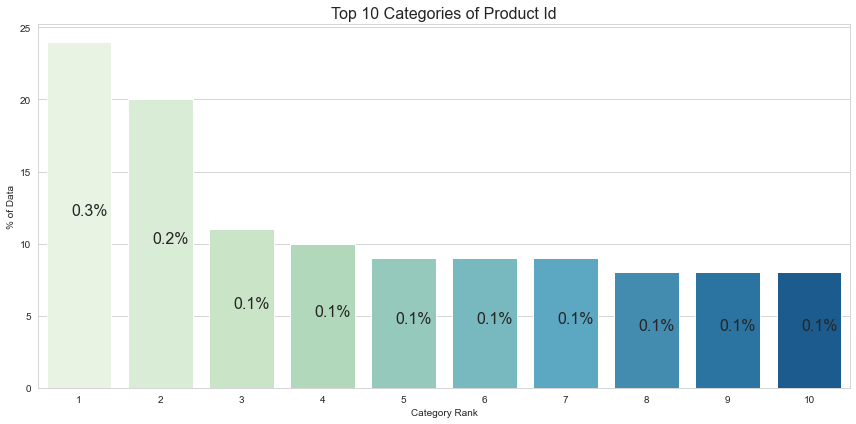

In [12]:
dataset.profile.topn_plot(column='product_id')

In [13]:
dataset.profile.cfd_plot(column='product_id')

AttributeError: 'NoneType' object has no attribute 'all'

The top 10 products by frequency constitute less than 2% of the data; however, the exponential cumulative frequency distribution manifests a rapid, steep climb as categories are added.   
### Device Type

In [ ]:
dataset.profile.analyze(column='device_type')

Nearly all of the data are represented by top 3 of the 8 device types.
### Audience Id

In [ ]:
dataset.analyze(column='audience_id')

### Product Gender

In [ ]:
dataset.analyze(column='product_gender')

### Product Brand

In [ ]:
dataset.analyze(column='product_brand')

### Product Category 1

In [ ]:
dataset.analyze(column='product_category_1')

### Product Category 2

In [ ]:
dataset.analyze(column='product_category_2')

### Product Category 3

In [ ]:
dataset.analyze(column='product_category_3')

### Product Category 4

In [ ]:
dataset.analyze(column='product_category_4')

### Product Category 5

In [ ]:
dataset.analyze(column='product_category_5')

### Product Category 6

In [ ]:
dataset.analyze(column='product_category_6')

### Product Category 7

In [ ]:
dataset.analyze(column='product_category_7')

### Product Country

In [ ]:
dataset.analyze(column='product_country')

### Product Id

In [ ]:
dataset.analyze(column='product_id')

### Partner Id

In [ ]:
dataset.analyze(column='partner_id')